In [1]:
# In[2]:
import sys
sys.path.append('/Users/kvirk/devel/pyMie')
#import matplotlib
#matplotlib.use('TKAgg')
import numpy as np
from numpy import exp
from math import pi
from scipy import special as sp
from src import mie,vsh
from src.mie import compute_fields, em
import time
#

from matplotlib import pyplot as plt

def pupil_sampling(nk1,nk2):
    kx, ky = [1e-6+c.flatten() for c in np.meshgrid(np.linspace(-0.9*k0,0.9*k0, nk1),np.linspace(-0.9*k0,0.9*k0, nk2)) ]
    k2 = kx**2 + ky**2
    kx = kx[k2<k0**2]
    ky = ky[k2<k0**2]
    kz = np.sqrt(k0**2 - k2[k2<k0**2])
    kvec = np.vstack((kx,ky,kz)).T
    khatOUT = kvec / k0 
    return khatOUT
#
def pupil_sampling_line(nk):
    t = np.linspace(0.001, pi, nk)
    kz = k0*np.cos(t)
    kx = k0*np.sin(t)
    kvec = np.vstack((kx,kx*0,kz)).T
    khatOUT = kvec / k0 
    return khatOUT
#
def pupil_sampling_circle(nk):
    t = np.linspace(0,pi,6)
    kx,ky = np.cos(t)*k0*0.9, np.sin(t)*k0*0.9
    kvec = np.vstack((kx,ky,kz)).T
    khatOUT = kvec / k0 
    return khatOUT

k0 = 2*pi
wavelengths = [288., 375., 800.]
refr={
    'Si' : [4.1+5.4j,6.7+1.3j,3.7],
    'SiO2' : [1.5,1.5,1.5],
    'Mo' : [3.1+4.4j, 3.5+3.5j, 3.7 + 3.6j]
}

khatO = pupil_sampling_line(50)
khatI = np.array([[0.,0.,1.]])
ehatI = np.array([[0.,1.,0.]])
#
eo, ei = em.dyadic_vectors(khatO, khatI)
eo = np.array(eo)
ei = np.array(ei)

In [2]:
Slist=[]
ka=6
maxL=20
for radius in [ka/2/pi]:
    S = mie.far_field_dyadic(maxL, 2., radius, khatO, khatI)
    Slist.append((radius,S))

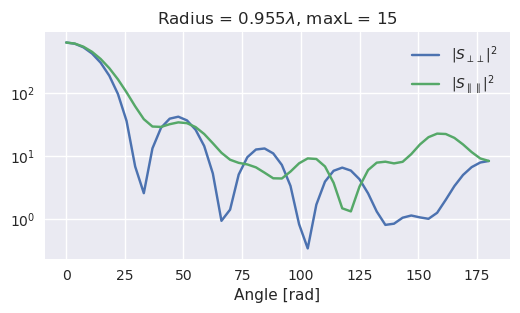

In [18]:
x = np.arccos(khatO[:,2])*180/pi

with plt.style.context('seaborn'):
    for radius,S in Slist:
        fig,ax=plt.subplots(figsize=(6,3),dpi=100)
        ax.plot(x, k0**2 * np.abs(S[:,0])**2,label='$|S_{\perp\perp}|^2$')
        ax.plot(x, k0**2 * np.abs(S[:,-1])**2,label='$|S_{\parallel\parallel}|^2$')
        ax.set_yscale('log')
        ax.set_xlabel('Angle [rad]')
        ax.legend()
        ax.set_title('Radius = {:.3f}$\lambda$, maxL = {:d}'.format(radius,maxL))

plt.show()

In [23]:
a=k0**2 * np.abs(Slist[0][1][[0,-1],0])**2